In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("E:\\download folder\\ToyotaCorolla.csv", encoding='latin-1')
df.shape

(1436, 38)

In [3]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df= df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
df=df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
df.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [9]:
df[df.values==0.0]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [10]:
df[df.duplicated()].shape

(1, 9)

In [11]:
#Found duplicate values

df[df.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [12]:
#Dropped duplicate values

df=df.drop_duplicates().reset_index(drop=True)
df[df.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [13]:
#Data visualization of the continuous featurs with the help of Histograms and probability plot

import pylab

def plot_df(df, features):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[features].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[features], dist='norm', plot= pylab)

Text(0.5, 1.0, 'Weight')

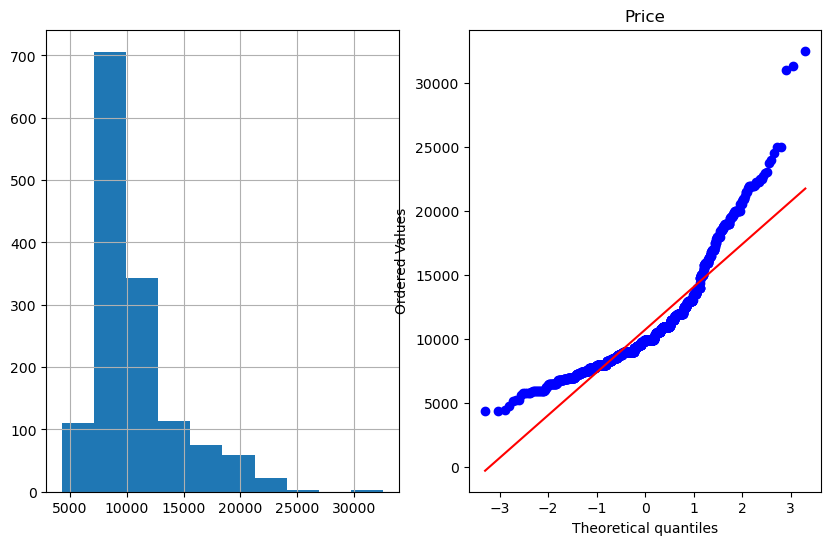

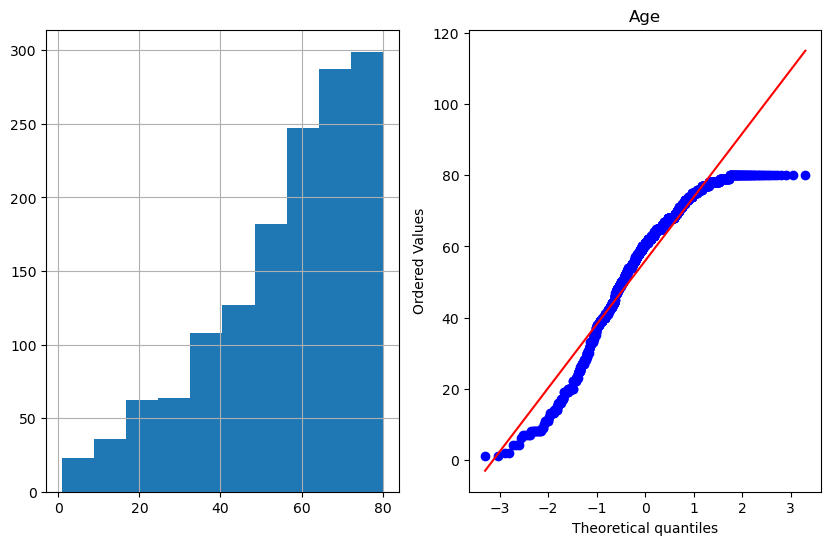

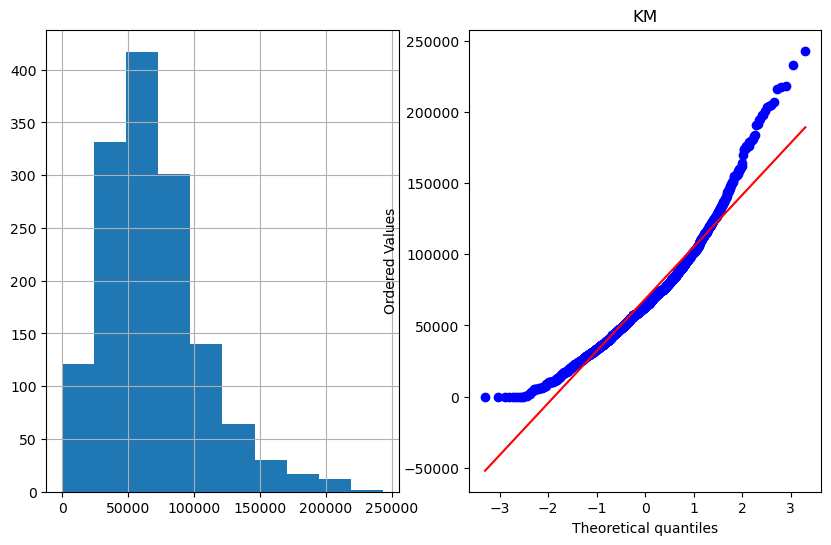

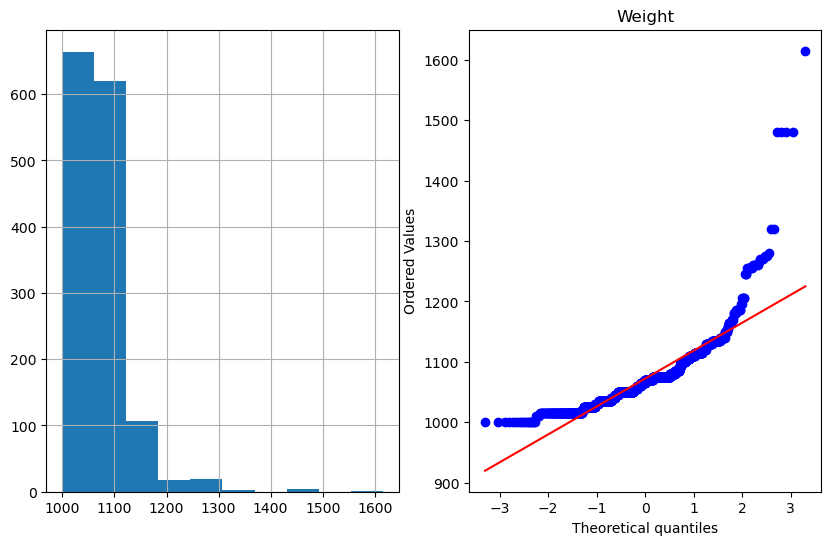

In [14]:
plot_df(df, "Price")
plt.title("Price")
plot_df(df, "Age")
plt.title("Age")
plot_df(df, "KM")
plt.title("KM")
plot_df(df, "Weight")
plt.title("Weight")

Text(0.5, 1.0, 'Weight')

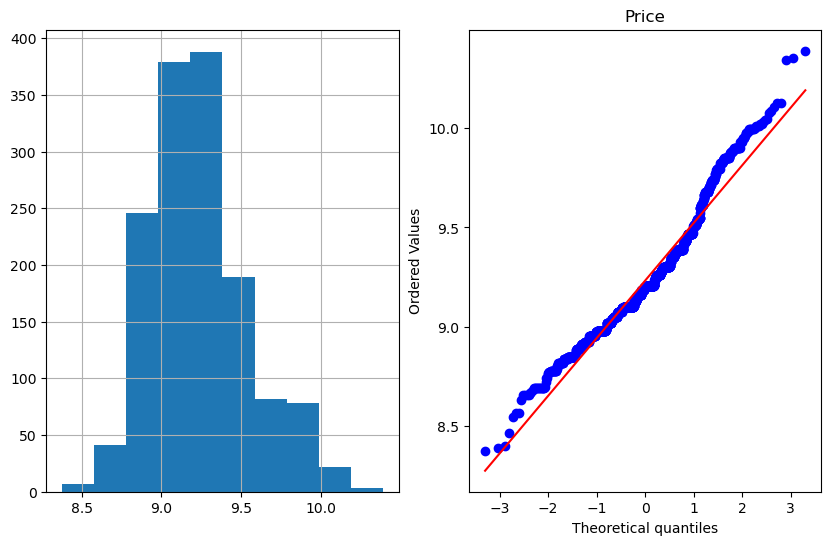

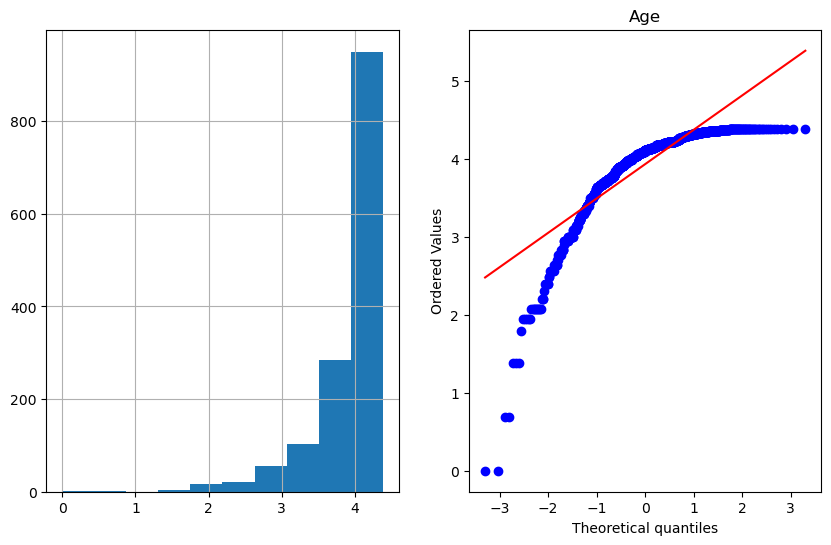

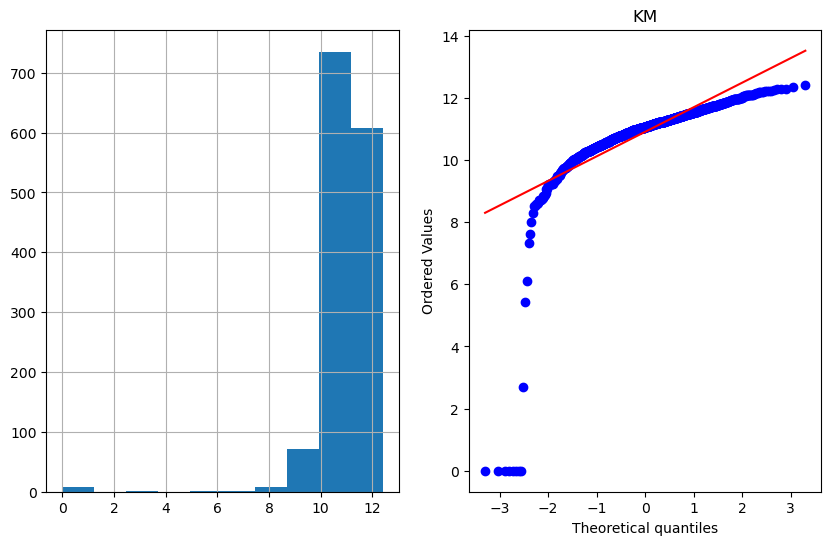

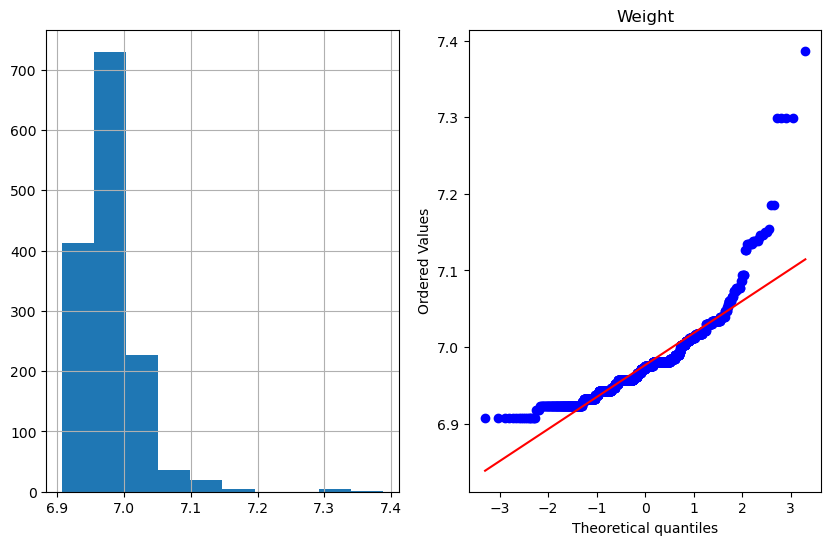

In [15]:
# Data visualization after Log transformation

df_new= df.copy()
df_new= np.log(df[["Price", "Age", "KM", "Weight"]])

plot_df(df_new, "Price")
plt.title("Price")
plot_df(df_new, "Age")
plt.title("Age")
plot_df(df_new, "KM")
plt.title("KM")
plot_df(df_new, "Weight")
plt.title("Weight")

Text(0.5, 1.0, 'Weight')

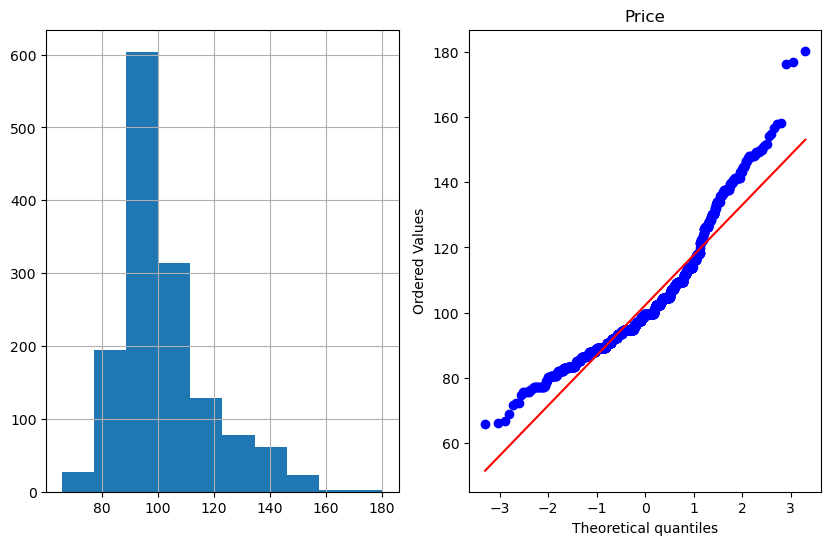

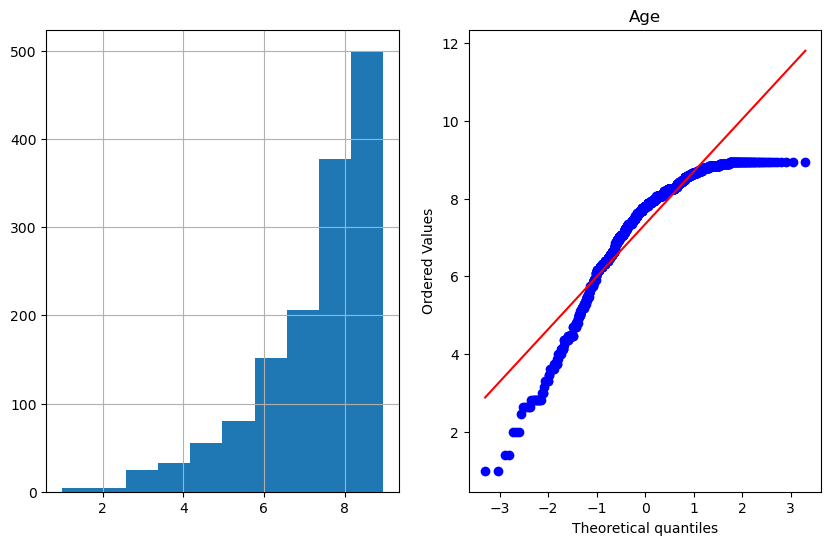

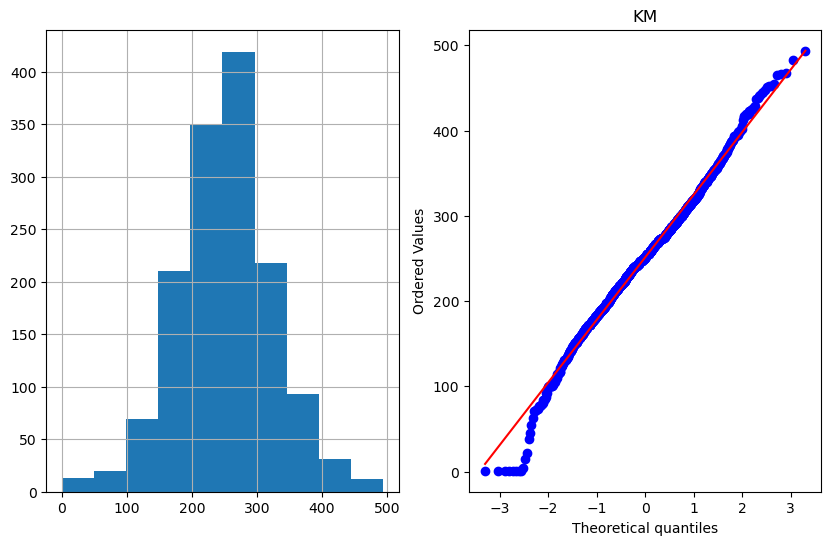

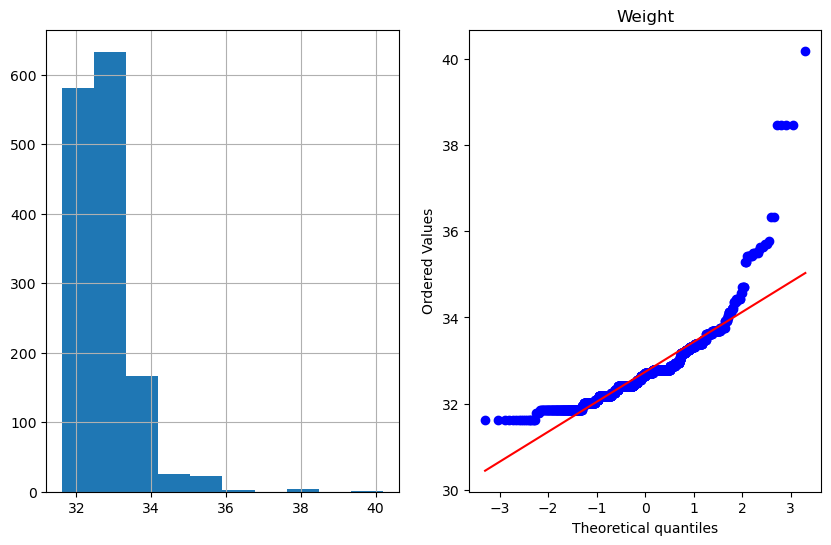

In [16]:
# Data visualization after Sqaure root transformation

df_new= df.copy()
df_new= np.sqrt(df[["Price", "Age", "KM", "Weight"]])

plot_df(df_new, "Price")
plt.title("Price")
plot_df(df_new, "Age")
plt.title("Age")
plot_df(df_new, "KM")
plt.title("KM")
plot_df(df_new, "Weight")
plt.title("Weight")

Text(0.5, 1.0, 'Weight')

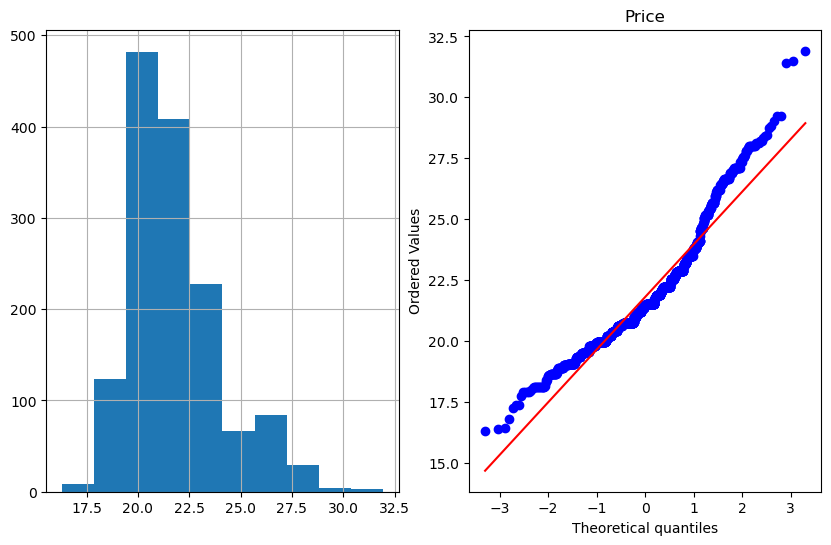

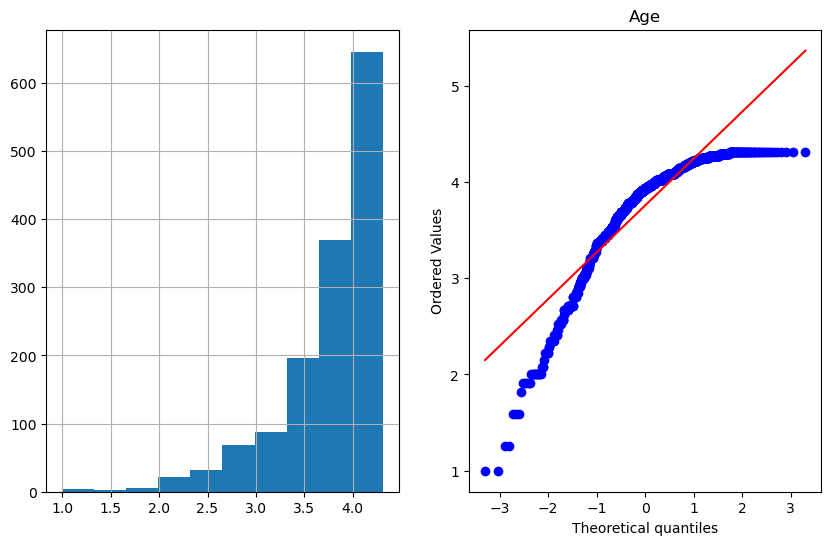

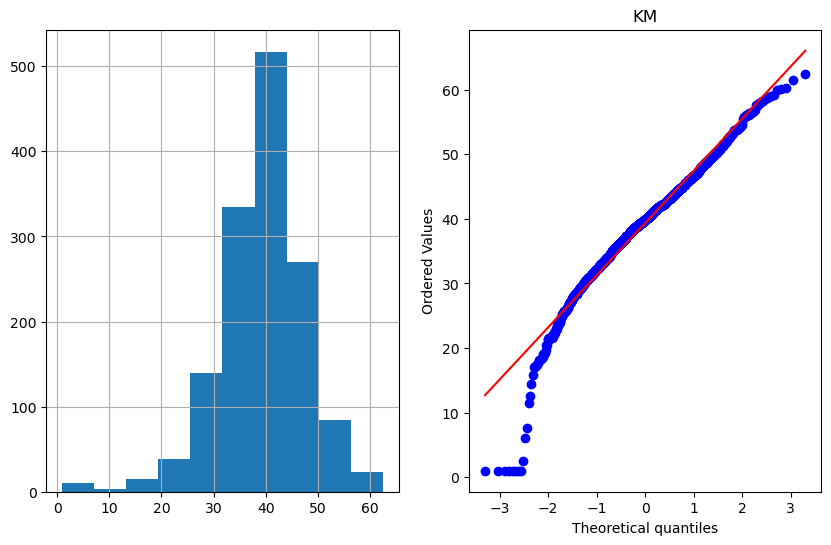

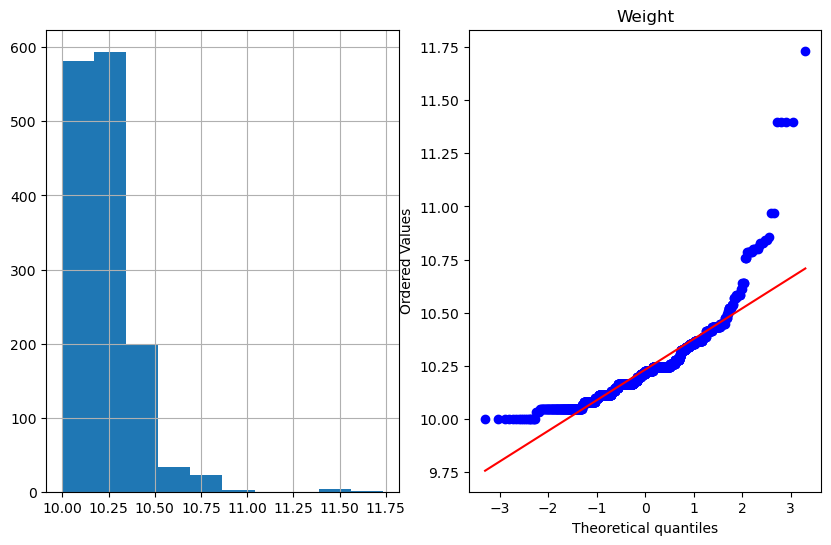

In [17]:
# Data visualization after Cube root transformation

df_new= df.copy()
df_new= np.cbrt(df[["Price", "Age", "KM", "Weight"]])

plot_df(df_new, "Price")
plt.title("Price")
plot_df(df_new, "Age")
plt.title("Age")
plot_df(df_new, "KM")
plt.title("KM")
plot_df(df_new, "Weight")
plt.title("Weight")

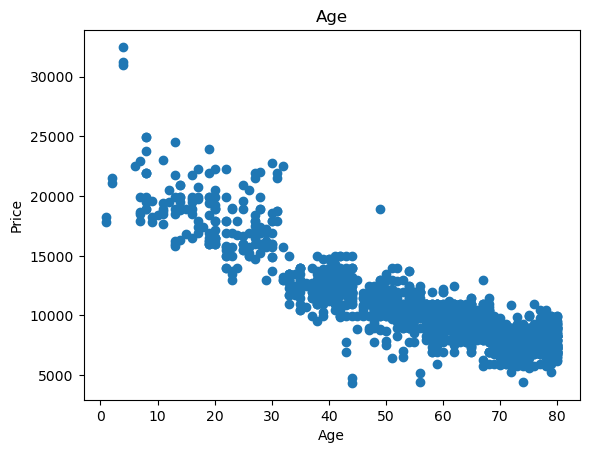

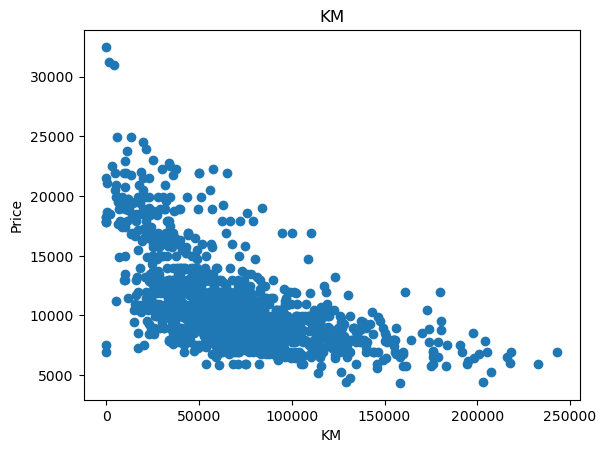

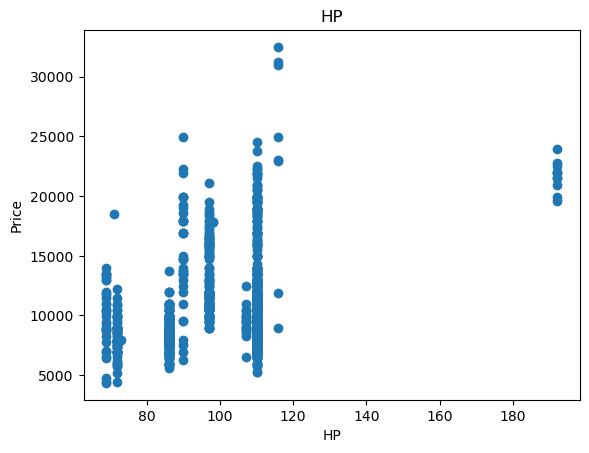

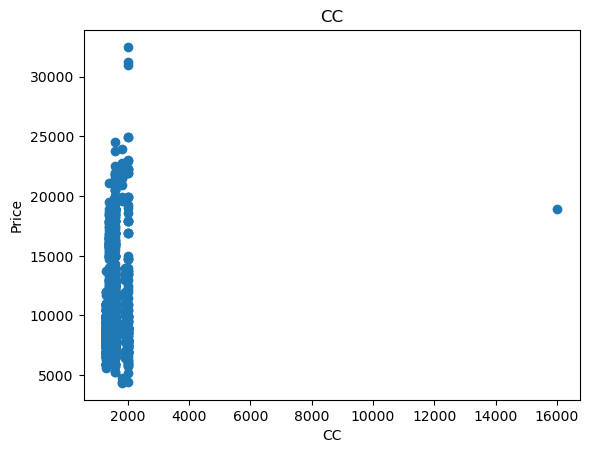

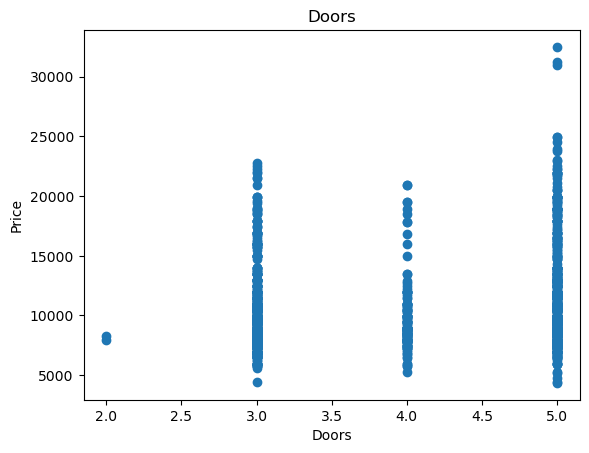

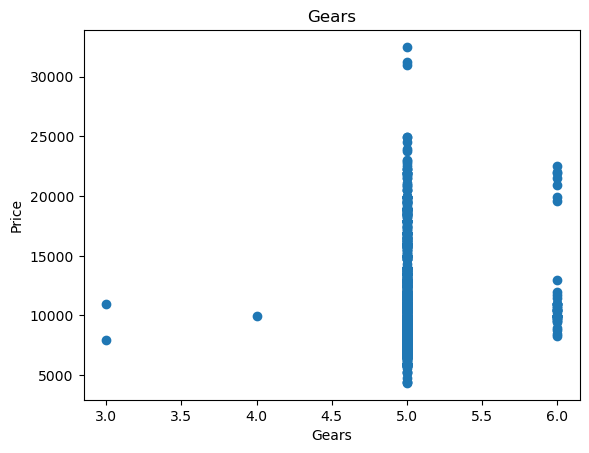

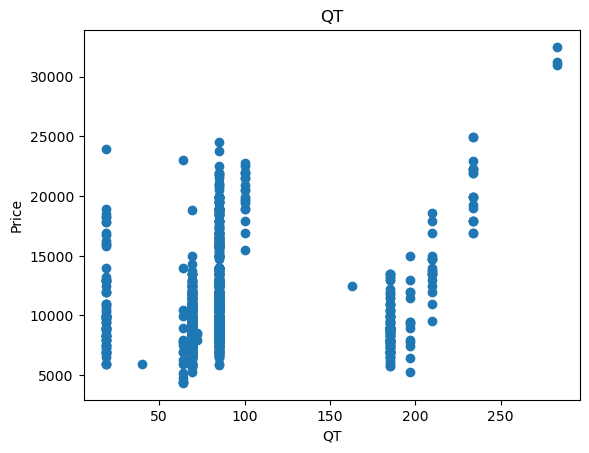

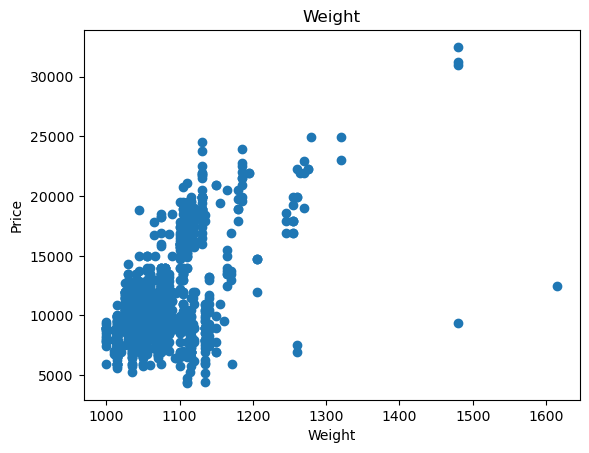

In [18]:
# Visualizing the relation between every x and y variable.

for i in df.columns:
    if i!= "Price":
        df_new= df.copy()
        plt.scatter(df[i], df["Price"])
        plt.xlabel(i)
        plt.ylabel("Price")
        plt.title(i)
        plt.show()

In [19]:
# Therefore, only age has negative linear relationship with y variable(Price)

Text(0.5, 1.0, 'Weight')

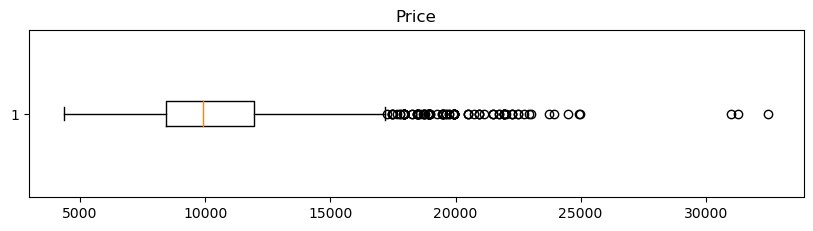

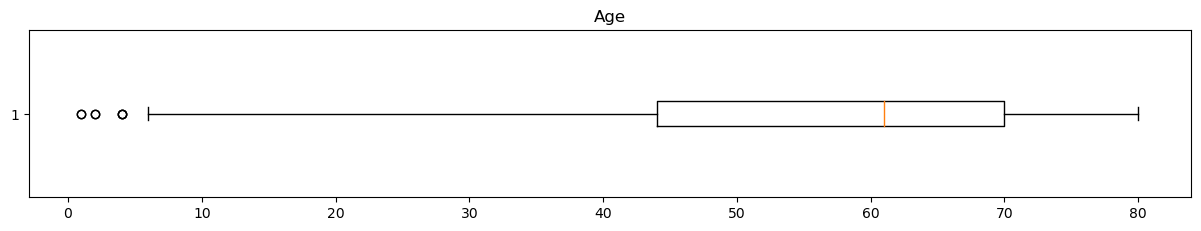

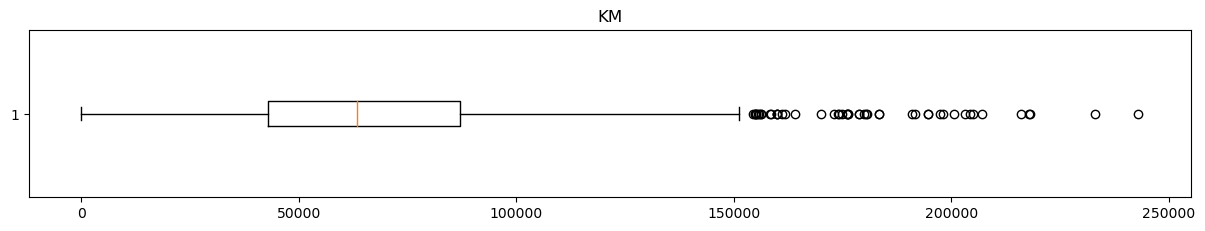

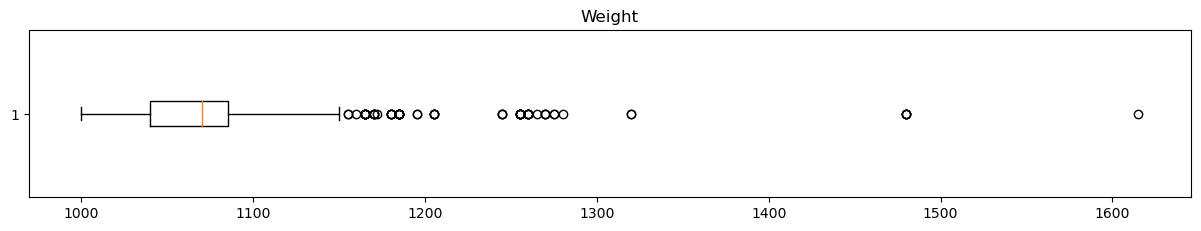

In [20]:
# Visualizing continuous data for outlier detection

plt.figure(figsize=(10,10))
plt.subplot(4,1,1)
plt.boxplot(df["Price"], vert=False)
plt.title("Price")
plt.figure(figsize=(15,10))
plt.subplot(4,1,2)
plt.boxplot(df["Age"], vert=False)
plt.title("Age")
plt.figure(figsize=(15,10))
plt.subplot(4,1,3)
plt.boxplot(df["KM"], vert=False)
plt.title("KM")
plt.figure(figsize=(15,10))
plt.subplot(4,1,4)
plt.boxplot(df["Weight"], vert=False)
plt.title("Weight")


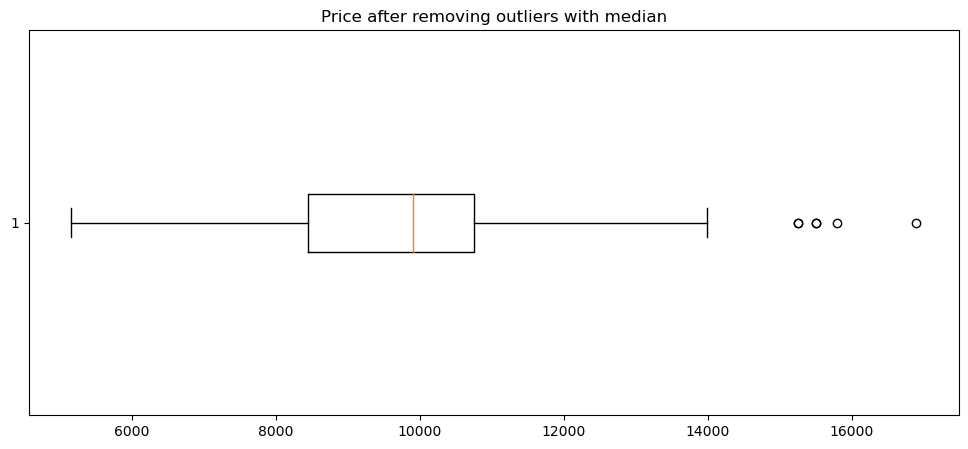

In [21]:
#Handling outlier with median imputation

df_new1= df.copy()

for i in df_new1["Price"]:
    q1= np.quantile(df_new1["Price"], 0.25)
    q3= np.quantile(df_new1["Price"], 0.75)
    med= np.median(df_new1["Price"])
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df_new1["Price"]= df_new1["Price"].replace(i, med)
plt.figure(figsize=(12, 5))
plt.boxplot(df_new1["Price"], vert=False)
plt.title("Price after removing outliers with median")
plt.show()

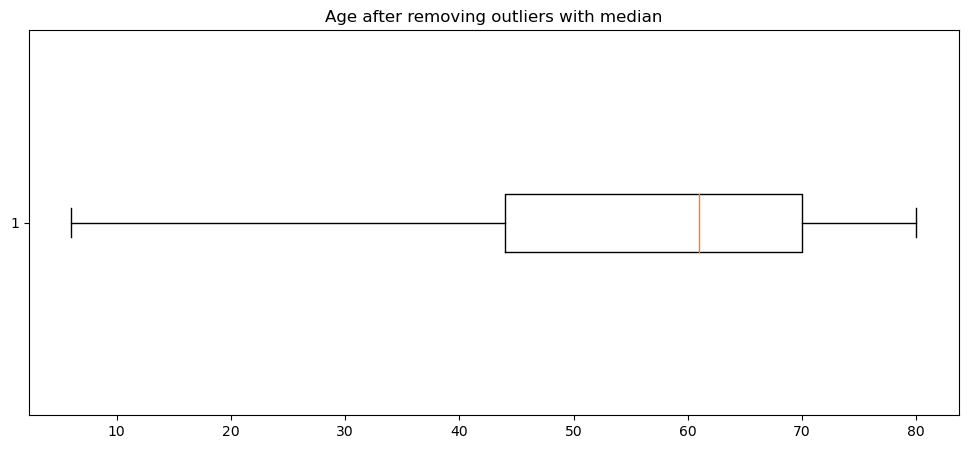

In [22]:
for i in df_new1["Age"]:
    q1= np.quantile(df_new1["Age"], 0.25)
    q3= np.quantile(df_new1["Age"], 0.75)
    med= np.median(df_new1["Age"])
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df_new1["Age"]= df_new1["Age"].replace(i, med)
plt.figure(figsize=(12, 5))
plt.boxplot(df_new1["Age"], vert=False)
plt.title("Age after removing outliers with median")
plt.show()

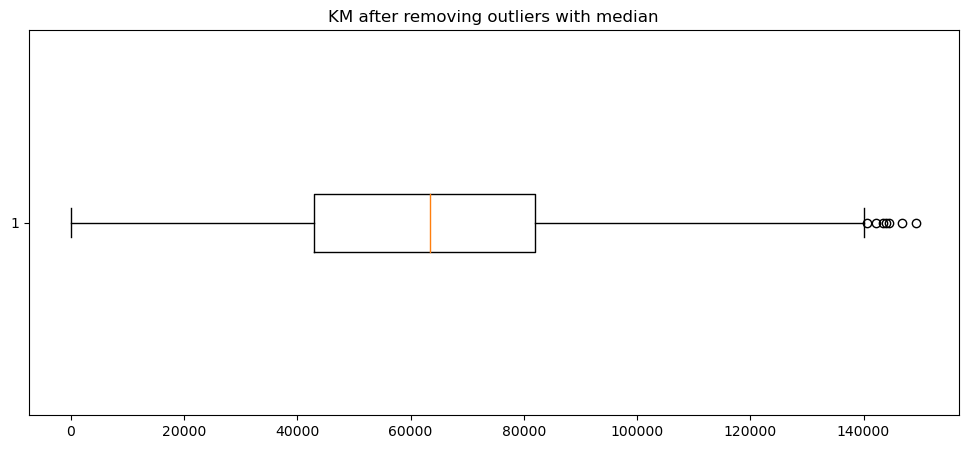

In [23]:
for i in df_new1["KM"]:
    q1= np.quantile(df_new1["KM"], 0.25)
    q3= np.quantile(df_new1["KM"], 0.75)
    med= np.median(df_new1["KM"])
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df_new1["KM"]= df_new1["KM"].replace(i, med)
plt.figure(figsize=(12, 5))
plt.boxplot(df_new1["KM"], vert=False)
plt.title("KM after removing outliers with median")
plt.show()

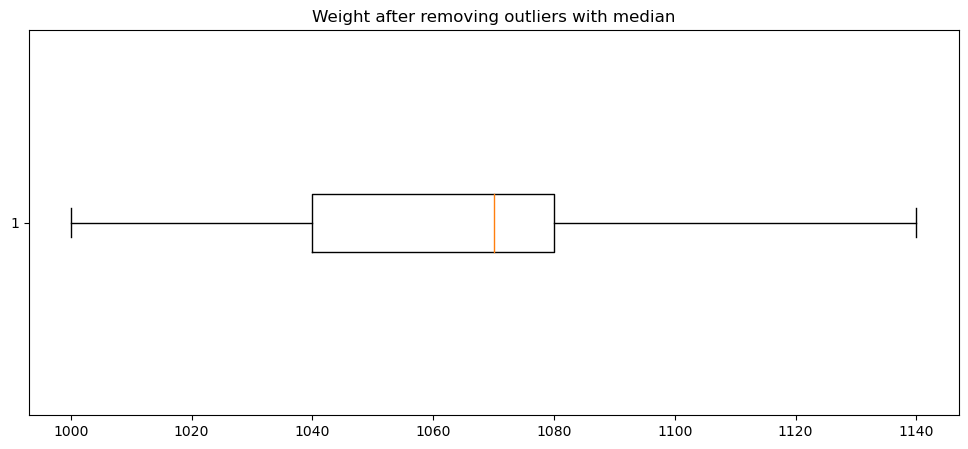

In [24]:
for i in df_new1["Weight"]:
    q1= np.quantile(df_new1["Weight"], 0.25)
    q3= np.quantile(df_new1["Weight"], 0.75)
    med= np.median(df_new1["Weight"])
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df_new1["Weight"]= df_new1["Weight"].replace(i, med)
plt.figure(figsize=(12, 5))
plt.boxplot(df_new1["Weight"], vert=False)
plt.title("Weight after removing outliers with median")
plt.show()

In [25]:
y= df_new1["Price"]
x= df_new1.iloc[:, 1:]
x= np.array(x)
x.reshape(-1,1)

ss_x= df_new1["Age"],df_new1["KM"],df_new1["Weight"]
ss_x=pd.DataFrame(ss_x)
ss_x=ss_x.transpose()
ss_x

,Age,KM,Weight
0,23,46986,1070
1,23,72937,1070
2,24,41711,1070
3,26,48000,1070
4,30,38500,1070
...,...,...,...
1430,69,20544,1025
1431,72,19000,1015
1432,71,17016,1015
1433,70,16916,1015


In [26]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss_x= ss.fit_transform(ss_x)
ss_x = pd.DataFrame(ss_x, columns=['Age', 'KM', 'Weight'])
ss_x

,Age,KM,Weight
0,-1.829889,-0.567209,0.172746
1,-1.829889,0.301380,0.172746
2,-1.774880,-0.743765,0.172746
3,-1.664863,-0.533270,0.172746
4,-1.444829,-0.851238,0.172746
...,...,...,...
1430,0.700507,-1.452232,-1.213839
1431,0.865533,-1.503910,-1.521969
1432,0.810524,-1.570315,-1.521969
1433,0.755515,-1.573662,-1.521969


In [27]:
x = pd.concat([ss_x, df_new1[["HP", "CC", "Doors", "Gears", "QT"]]], axis=1)

y= df_new1["Price"]

In [28]:
#Data partition 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30)

In [29]:
#Model fitting

from sklearn.linear_model import LinearRegression

LR= LinearRegression()
LR.fit(x_train, y_train)
y_pred_train= LR.predict(x_train)
y_pred_test= LR.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

training_error= mean_squared_error(y_train, y_pred_train)
testing_error= mean_squared_error(y_test, y_pred_test)

training_score= r2_score(y_train, y_pred_train)
testing_score= r2_score(y_test, y_pred_test)

print("RMSE of training: ", np.sqrt(training_error).round(2))
print("RMSE of testing: ", np.sqrt(testing_error).round(2))

print("R square of training: ", training_score.round(2))
print("R square of testing: ", testing_score.round(2))

RMSE of training:  1425.03
RMSE of testing:  1419.7
R square of training:  0.38
R square of testing:  0.34


In [30]:
#Cross validaton 

training_error= []
testing_error=[]

training_score=[]
testing_score=[]

for i in range(1,201):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.30, random_state=i)
    LR.fit(x_train, y_train)
    y_pred_train= LR.predict(x_train)
    y_pred_test= LR.predict(x_test)
    training_error.append(mean_squared_error(y_train, y_pred_train))
    testing_error.append(mean_squared_error(y_test, y_pred_test))
    training_score.append(r2_score(y_train, y_pred_train))
    testing_score.append(r2_score(y_test, y_pred_test))
print("Root mean squared error of training: ", np.mean(np.sqrt(training_error)).round(2))
print("Root mean squared error of testing: ", np.mean(np.sqrt(testing_error)).round(2))

print("R square of training: ",np.mean((training_score)).round(2))
print("R square of testing: ", np.mean((testing_score)).round(2))

Root mean squared error of training:  1420.25
Root mean squared error of testing:  1487.88
R square of training:  0.37
R square of testing:  0.3


In [31]:
df_new1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.578942,-0.368436,0.184066,0.029201,0.181245,0.048644,0.052047,0.171369
Age,-0.578942,1.000000,0.523065,-0.150794,-0.093659,-0.136474,-0.007949,-0.173827,-0.367351
KM,-0.368436,0.523065,1.000000,-0.200748,0.038658,-0.021159,0.029710,0.136393,-0.046786
HP,0.184066,-0.150794,-0.200748,1.000000,0.035207,0.091803,0.209642,-0.302287,0.013188
CC,0.029201,-0.093659,0.038658,0.035207,1.000000,0.079254,0.014732,0.305982,0.277103
Doors,0.181245,-0.136474,-0.021159,0.091803,0.079254,1.000000,-0.160101,0.107353,0.427100
Gears,0.048644,-0.007949,0.029710,0.209642,0.014732,-0.160101,1.000000,-0.005125,-0.024486
QT,0.052047,-0.173827,0.136393,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.438981
Weight,0.171369,-0.367351,-0.046786,0.013188,0.277103,0.427100,-0.024486,0.438981,1.000000


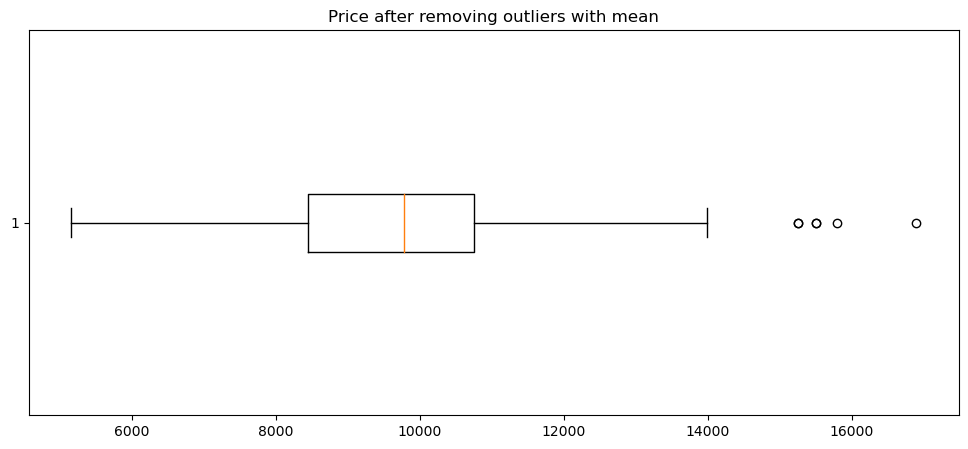

In [32]:
#Handling outlier with mean imputation

df_new2= df.copy()

for i in df_new2["Price"]:
    q1= np.quantile(df_new2["Price"], 0.25)
    q3= np.quantile(df_new2["Price"], 0.75)
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df_new2["Price"]= df_new2["Price"].replace(i, np.mean(df_new2["Price"]))
plt.figure(figsize=(12, 5))
plt.boxplot(df_new2["Price"], vert=False)
plt.title("Price after removing outliers with mean")
plt.show()

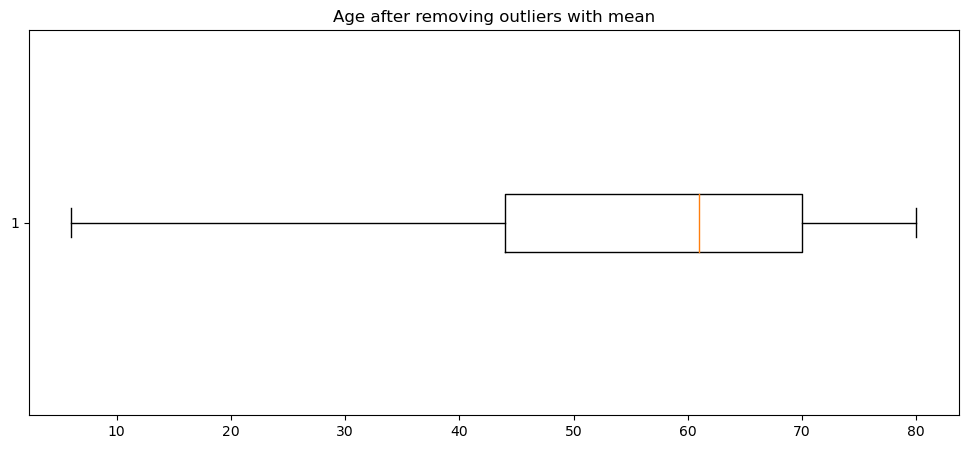

In [33]:
for i in df_new2["Age"]:
    q1= np.quantile(df_new2["Age"], 0.25)
    q3= np.quantile(df_new2["Age"], 0.75)
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df_new2["Age"]= df_new2["Age"].replace(i, np.mean(df_new2["Age"]))
plt.figure(figsize=(12, 5))
plt.boxplot(df_new2["Age"], vert=False)
plt.title("Age after removing outliers with mean")
plt.show()

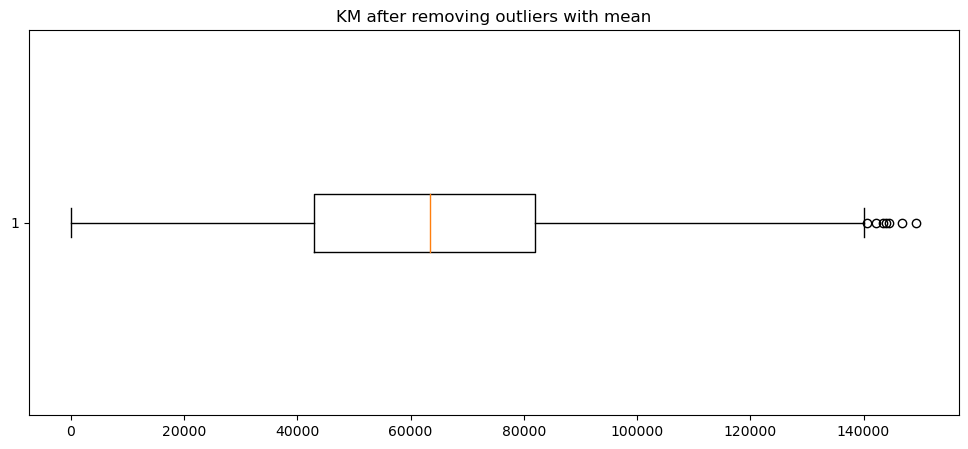

In [34]:
for i in df_new2["KM"]:
    q1= np.quantile(df_new2["KM"], 0.25)
    q3= np.quantile(df_new2["KM"], 0.75)
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df_new2["KM"]= df_new2["KM"].replace(i, np.mean(df_new2["KM"]))
plt.figure(figsize=(12, 5))
plt.boxplot(df_new2["KM"], vert=False)
plt.title("KM after removing outliers with mean")
plt.show()

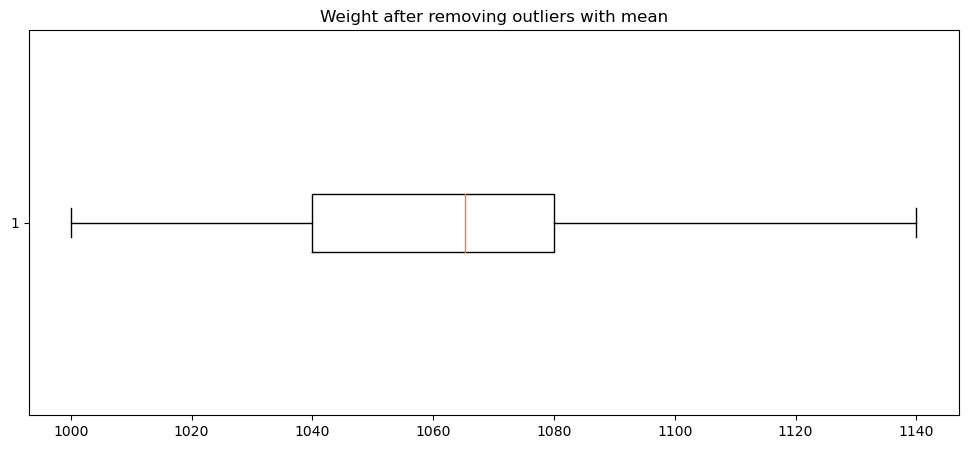

In [35]:
for i in df_new2["Weight"]:
    q1= np.quantile(df_new2["Weight"], 0.25)
    q3= np.quantile(df_new2["Weight"], 0.75)
    iqr= q3-q1
    upper_bound= q3+1.5*(iqr)
    lower_bound= q1-1.5*(iqr)
    if i > upper_bound or i< lower_bound:
        df_new2["Weight"]= df_new2["Weight"].replace(i, np.mean(df_new2["Weight"]))
plt.figure(figsize=(12, 5))
plt.boxplot(df_new2["Weight"], vert=False)
plt.title("Weight after removing outliers with mean")
plt.show()

In [36]:
df_new2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500.000000,23.0,46986.0,90,2000,3,5,210,1072.287108
1,13750.000000,23.0,72937.0,90,2000,3,5,210,1072.287108
2,13950.000000,24.0,41711.0,90,2000,3,5,210,1072.287108
3,10238.651011,26.0,48000.0,90,2000,3,5,210,1072.287108
4,13750.000000,30.0,38500.0,90,2000,3,5,210,1071.770242
...,...,...,...,...,...,...,...,...,...
1430,7500.000000,69.0,20544.0,86,1300,3,5,69,1025.000000
1431,10845.000000,72.0,19000.0,86,1300,3,5,69,1015.000000
1432,8500.000000,71.0,17016.0,86,1300,3,5,69,1015.000000
1433,7250.000000,70.0,16916.0,86,1300,3,5,69,1015.000000


In [37]:
y= df_new2["Price"]
x= df_new2.iloc[:, 1:]
x= np.array(x)
x.reshape(-1,1)

ss_x= df_new2["Age"],df_new2["KM"],df_new2["Weight"]
ss_x=pd.DataFrame(ss_x)
ss_x=ss_x.transpose()
ss_x

,Age,KM,Weight
0,23.0,46986.0,1072.287108
1,23.0,72937.0,1072.287108
2,24.0,41711.0,1072.287108
3,26.0,48000.0,1072.287108
4,30.0,38500.0,1071.770242
...,...,...,...
1430,69.0,20544.0,1025.000000
1431,72.0,19000.0,1015.000000
1432,71.0,17016.0,1015.000000
1433,70.0,16916.0,1015.000000


In [38]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss_x= ss.fit_transform(ss_x)
ss_x = pd.DataFrame(ss_x, columns=['Age', 'KM', 'Weight'])
ss_x

,Age,KM,Weight
0,-1.828868,-0.570998,0.244800
1,-1.828868,0.297459,0.244800
2,-1.773850,-0.747527,0.244800
3,-1.663815,-0.537064,0.244800
4,-1.443744,-0.854984,0.228872
...,...,...,...
1430,0.701948,-1.455887,-1.212409
1431,0.867001,-1.507557,-1.520572
1432,0.811983,-1.573952,-1.520572
1433,0.756965,-1.577299,-1.520572


In [39]:
x = pd.concat([ss_x, df_new1[["HP", "CC", "Doors", "Gears", "QT"]]], axis=1)

y= df_new1["Price"]

In [40]:
#Data partition 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30)

In [41]:
#Cross validaton 

training_error= []
testing_error=[]

training_score=[]
testing_score=[]

for i in range(1,201):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.30, random_state=i)
    LR.fit(x_train, y_train)
    y_pred_train= LR.predict(x_train)
    y_pred_test= LR.predict(x_test)
    training_error.append(mean_squared_error(y_train, y_pred_train))
    testing_error.append(mean_squared_error(y_test, y_pred_test))
    training_score.append(r2_score(y_train, y_pred_train))
    testing_score.append(r2_score(y_test, y_pred_test))
print("Root mean squared error of training: ", np.mean(np.sqrt(training_error)).round(2))
print("Root mean squared error of testing: ", np.mean(np.sqrt(testing_error)).round(2))

print("R square of training: ",np.mean((training_score)).round(2))
print("R square of testing: ", np.mean((testing_score)).round(2))

Root mean squared error of training:  1420.32
Root mean squared error of testing:  1486.24
R square of training:  0.37
R square of testing:  0.3


In [174]:
#Since, there is improvement in the results let's try to remove outlier and check the reults

df3=df.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Price after removing outliers')

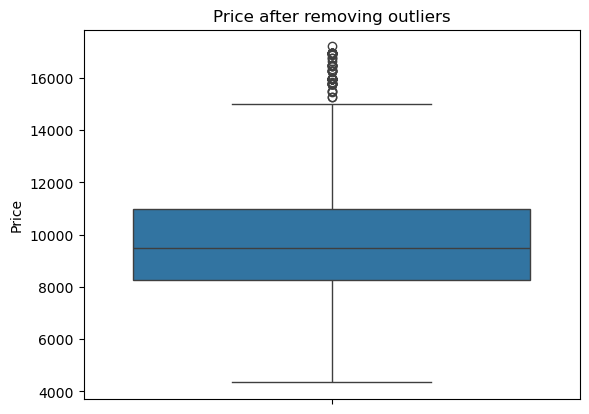

In [175]:
drop_outliers(df3, 'Price')
sns.boxplot(df3["Price"])
plt.title('Price after removing outliers')

Text(0.5, 1.0, 'Age after removing outliers')

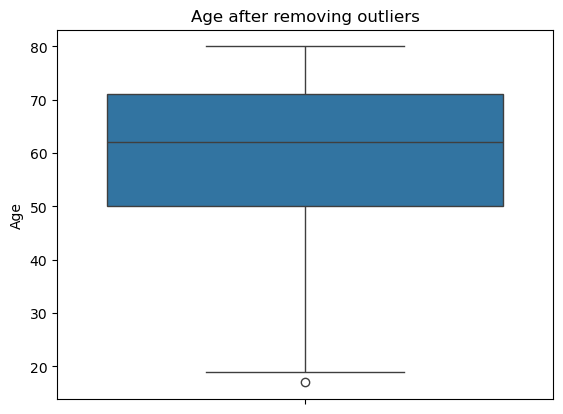

In [176]:
drop_outliers(df3, 'Age')
sns.boxplot(df3["Age"])
plt.title('Age after removing outliers')

Text(0.5, 1.0, 'KM after removing outliers')

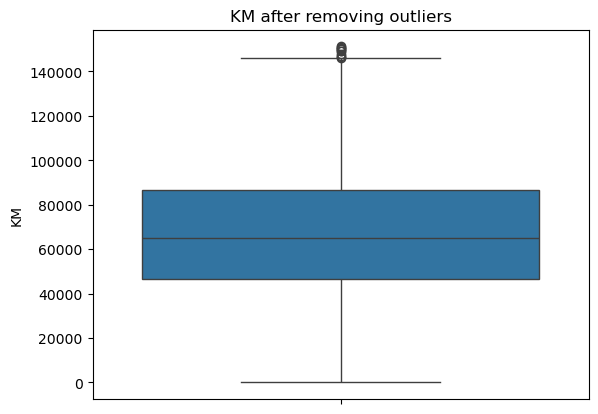

In [177]:
drop_outliers(df3, 'KM')
sns.boxplot(df3["KM"])
plt.title('KM after removing outliers')

Text(0.5, 1.0, 'Weight after removing outliers')

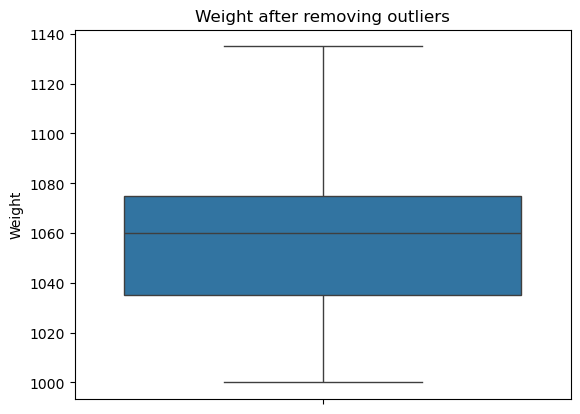

In [178]:
drop_outliers(df3, 'Weight')
sns.boxplot(df3["Weight"])
plt.title('Weight after removing outliers')

In [193]:
y= df3["Price"]
x= df3.iloc[:, 1:]
x= np.array(x)
x.reshape(-1,1)

ss_x= df3["Age"],df3["KM"],df3["Weight"]
ss_x=pd.DataFrame(ss_x)
ss_x=ss_x.transpose()
ss_x.head()

(1232, 3)

In [216]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss_x= ss.fit_transform(ss_x)
ss_x = pd.DataFrame(ss_x, columns=['Age', 'KM', 'Weight'])
ss_x.head()
ss_x.isnull().sum()


Age       0
KM        0
Weight    0
dtype: int64

In [225]:
x = ss_x

y= df3["Price"]

In [226]:
#Data partition 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30)

In [219]:
#Cross validaton 

training_error= []
testing_error=[]

training_score=[]
testing_score=[]

for i in range(1,201):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.30, random_state=i)
    LR.fit(x_train, y_train)
    y_pred_train= LR.predict(x_train)
    y_pred_test= LR.predict(x_test)
    training_error.append(mean_squared_error(y_train, y_pred_train))
    testing_error.append(mean_squared_error(y_test, y_pred_test))
    training_score.append(r2_score(y_train, y_pred_train))
    testing_score.append(r2_score(y_test, y_pred_test))
print("Root mean squared error of training: ", np.mean(np.sqrt(training_error)).round(2))
print("Root mean squared error of testing: ", np.mean(np.sqrt(testing_error)).round(2))

print("R square of training: ",np.mean((training_score)).round(2))
print("R square of testing: ", np.mean((testing_score)).round(2))

Root mean squared error of training:  1057.69
Root mean squared error of testing:  1061.6
R square of training:  0.78
R square of testing:  0.78
